
Linear Regression Results:
R2 Score: 0.882
RMSE: 17729.95

Random Forest Regressor Results:
R2 Score: 0.773
RMSE: 24644.76


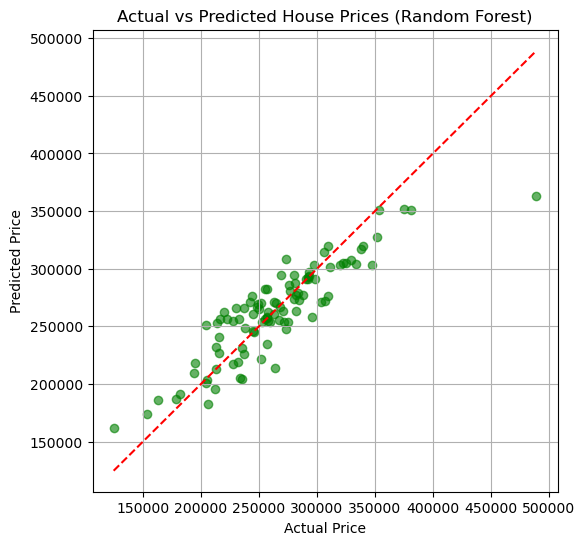

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate synthetic housing data
np.random.seed(42)
n_samples = 500

# Features
square_feet = np.random.normal(1500, 300, n_samples)
bedrooms = np.random.randint(2, 6, n_samples)
bathrooms = np.random.randint(1, 4, n_samples)
age = np.random.randint(0, 30, n_samples)
garage = np.random.choice([0, 1], size=n_samples, p=[0.3, 0.7])

# Price (target) = A function of features + some noise
price = (square_feet * 150) + (bedrooms * 10000) + (bathrooms * 7000) - (age * 1000) + (garage * 5000)
price += np.random.normal(0, 20000, n_samples)  # Add noise

# Create DataFrame
data = pd.DataFrame({
    'SquareFeet': square_feet,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Age': age,
    'Garage': garage,
    'Price': price
})

# Step 2: Split the data
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train models
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 5: Evaluate models
def evaluate(model_name, y_true, y_pred):
    print(f"\n{model_name} Results:")
    print("R2 Score:", round(r2_score(y_true, y_pred), 3))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))

evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Random Forest Regressor", y_test, y_pred_rf)

# Step 6: Visualize actual vs predicted for Random Forest
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Random Forest)")
plt.grid(True)
plt.show()
